![title](header.png)

Although Pandas is mainly used for creating and manipulating it's DataFrame object, it has some inbuilt data visualisation options that can be helpful to know when we want to create very quick graphs using default templates Pandas provides. Since these work through matplotlib, we can edit stylesheets and color options to make very professional looking graphs very quickly straight from the Pandas ecosystem. By the end of this guide you should be able to use Pandas' built in plots as a shortcut for creating quick plots when you don't need to use other libraries.

## Setting Up

As always, we need to import our libraries, but we're also going to run a few commands straight away to make things easier and look a bit nicer.

In [64]:
import matplotlib.pyplot as plt
import pandas as pd

#Saves us typing plt.show()
%matplotlib inline

#Gives the plots a nicer aesthetic
plt.style.use("ggplot")

We're also going to import some dummy data to demonstrate the ideas:

In [66]:
data1 = pd.read_csv("data1.csv")
data2 = pd.read_csv("data2.csv", index_col="Month")
print(data1.head()) #Two variables, 100 entries
print(data2.head()) #Six variables, six entries



          X         Y
0  0.440517  0.339287
1  1.895072 -0.683507
2  1.688482  0.214629
3 -1.455685 -1.249991
4 -0.847313  1.766436
              A         B         C         D         E         F
Month                                                            
Jan    0.979767  0.673105  0.864458  1.053850  1.786301  0.620862
Feb    0.670855  1.134268  0.042257  0.137518  0.985290  0.018479
Mar    0.859563  0.094422  0.262608  0.466578  0.243161  0.565645
Apr    0.530637  1.307388  0.509426  0.136473  0.225184  0.163804
May    0.810483  0.395508  0.699213  0.826256  2.365392  0.162536


There are a number of plots we can use for pandas, all used by calling the <i>df.plot.</i> sublibrary, but all of plots below can also be called by using <i>df.plot(kind='')</i> as well. Let's go through them one by one and see what they look like. First off, the Area plot, which we can either run on the whole dataframe or take a single column:

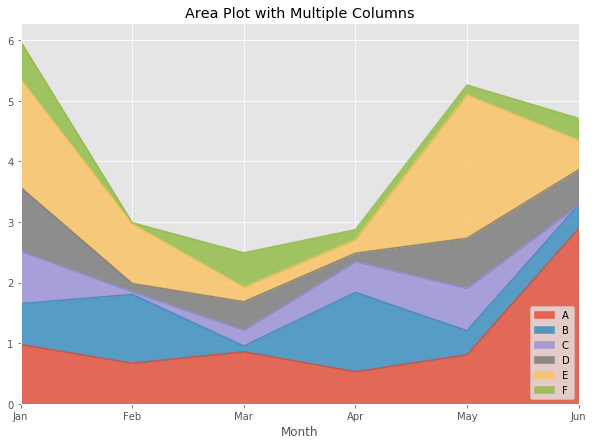

In [47]:
data2.plot.area(alpha=0.8, figsize=(10,7), title = "Area Plot with Multiple Columns")



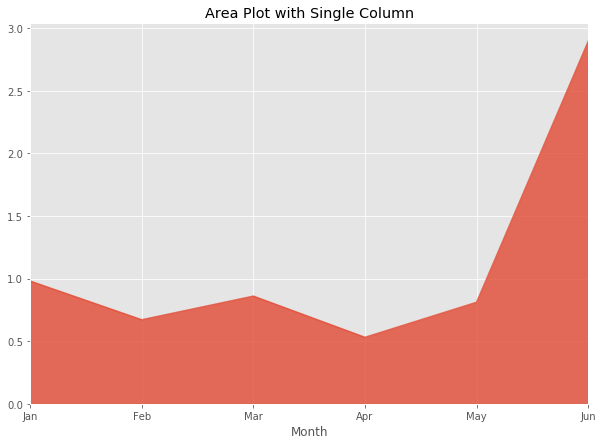

In [48]:
#Here we get just the A column of the data2 dataframe, then perform the same method on it.

data2["A"].plot.area(alpha=0.8, figsize=(10,7), title = "Area Plot with Single Column")

Some important things to know - the plot stacks the data, meaning visually we get the sum of the rows being broken down. This can be helpful for visualising costs against time, and then breaking them down by category.

The Bar plot is very similar to the area plot, but shifts the focus from trends along the x axis (time for example) to comparision between groups:

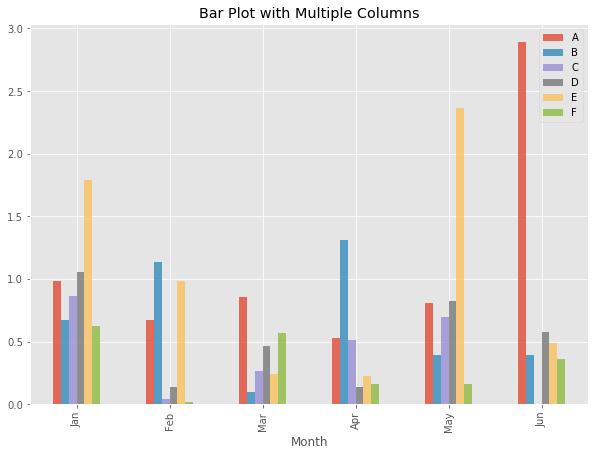

In [49]:
data2.plot.bar(alpha=0.8, figsize=(10,7), title = "Bar Plot")

The barh plot does exactly the same thing just horizontally:

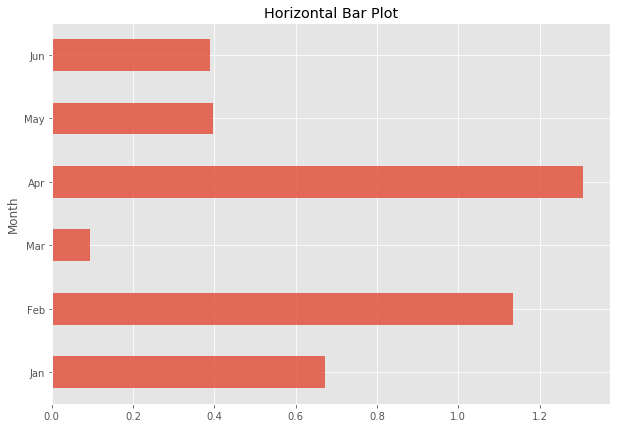

In [51]:
data2["B"].plot.barh(alpha=0.8, figsize=(10,7), title = "Horizontal Bar Plot")

When using data with more entries, it's not helpful to use these plots as we'd have far to many x points. A histogram is helpful here as it sorts the x values into bins:

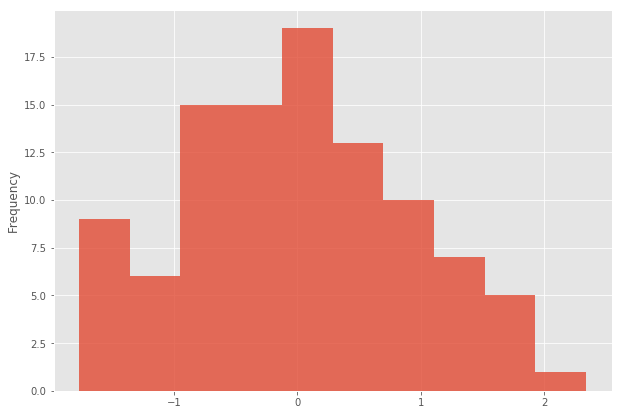

In [67]:
data1["Y"].plot.hist(alpha=0.8, figsize=(10,7))

Another way of looking at the distribution of data is a box plot:

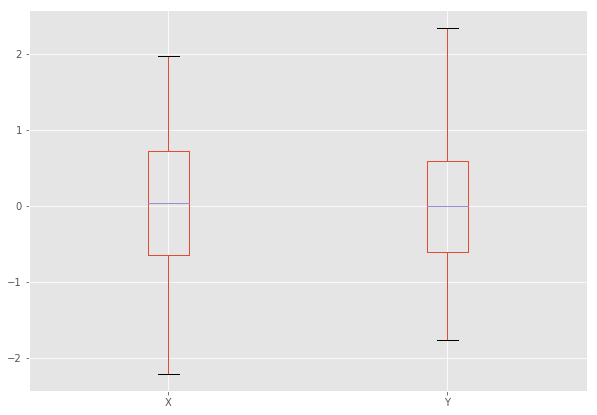

In [68]:
data1.plot.box(figsize=(10,7))

However, if we have categorical data like in the <i>data2</i> dataframe, we can get some insight into what it would look like if it were continuous using the kde or denisity plot:

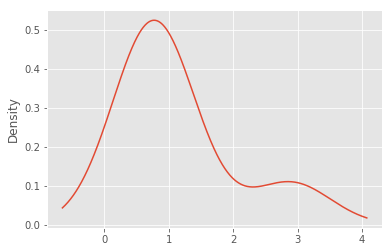

In [58]:
data2['A'].plot.kde()

We also have the classic pie plot...

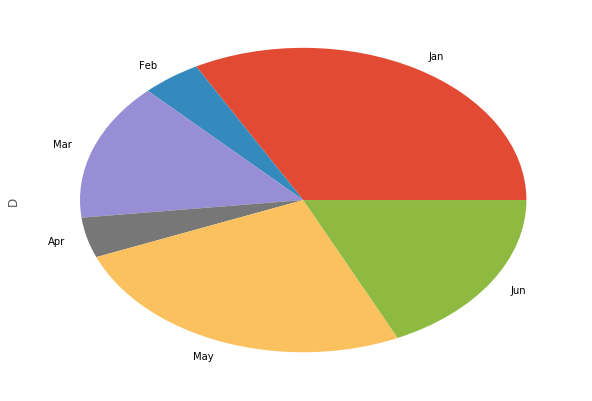

In [61]:
data2["D"].plot.pie(figsize=(10,7))

...the scatter plot...

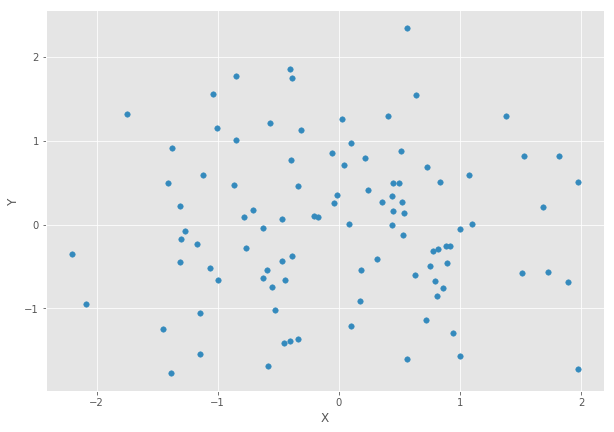

In [74]:
data1.plot.scatter(x="X", y="Y", figsize=(10,7),s=30)

...and finally, the hexbin plot, which works the same way as the scatter plot, but gives us a heatmap of the space:

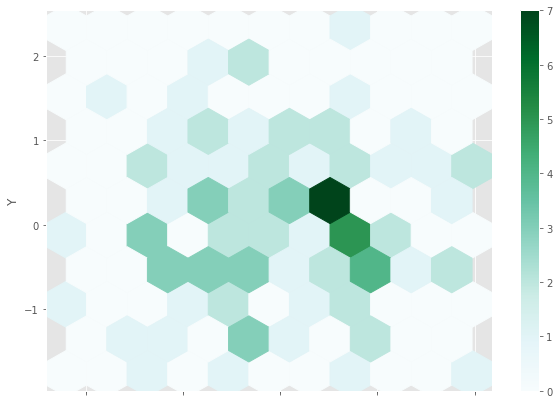

In [77]:
data1.plot.hexbin(x='X',y='Y',gridsize=10, figsize=(10,7))

## Worked Example

Pandas plots are usually used for a quick-and-dirty method to get a quick idea of what data looks like, and usually aren't used as a final plotting product. However, because they are built on matplotlib, we can still use some nifty tricks to get some nice results. In this example we're going to look at graphing population vs area vs gdp per capita of a number of countries:

In [84]:
countries = pd.read_excel('countries.xlsx', index_col="Country")
print(countries.head())

             Population          GDP       Area
Country                                        
Aruba          103889.0   594.323081      180.0
Afghanistan  32526562.0  4101.472152   652860.0
Angola       25021974.0  3945.217582  1246700.0
Albania       2889167.0          NaN    28750.0
Andorra         70473.0  6537.301118      470.0


Before we graph anything, note we have some NaNs in our data, meaning the data wasn't available. To get rid of these rows, we can just use the <i>dropna</i> method:

In [85]:
countries = countries.dropna()
print(countries.head())

              Population           GDP        Area
Country                                           
Aruba           103889.0    594.323081       180.0
Afghanistan   32526562.0   4101.472152    652860.0
Angola        25021974.0   3945.217582   1246700.0
Andorra          70473.0   6537.301118       470.0
Arab World   392168030.0  40438.762934  13152649.5


Great - now our dataframe has no rows with missing values, we can go ahead and plot our data:

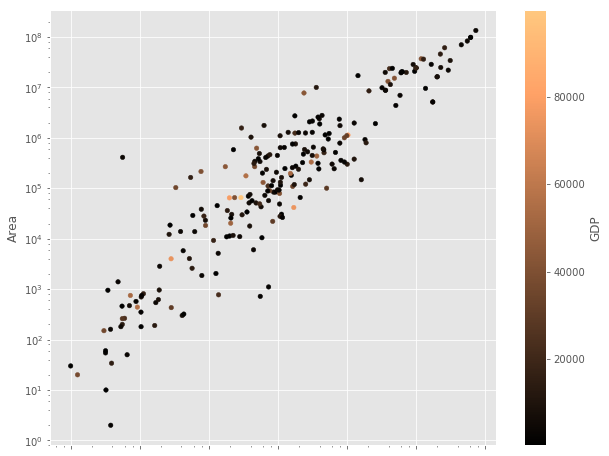

In [94]:
countries.plot.scatter(x="Population", y="Area", c="GDP", colormap="copper", figsize=(10,8), loglog=True)

## Mini Project

Below we have some data for people's ages and their salary, split by sex. Try graphing a scatter plot of the two, split by sex, and also a bar plot detailing the mean salary for men and women.